<a href="https://colab.research.google.com/github/ckim0130/classifier-tumor/blob/main/BreastCancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import rand
from numpy import log, dot, e
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#catherine's folder
df = pd.read_csv('/content/drive/My Drive/Research/breast-cancer-wisconsin.data')

In [ ]:
df.columns=["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitosis", "Class"]

Import the data and upload it, adding headings (These need to be changed depending on the dataset being used). Currently using the breast-cancer-wisconsin.data set

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('wdbc.data', header=None)
df.columns=["ID Number", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "L Radius", "L Texture", "L Perimeter", "L Area", "L Smoothness", "L Compactness", "L Concavity", "L Concave Points", "L Symetry", "L Fractal Dimension"]

Saving wdbc.data to wdbc (8).data


In [ ]:
type(uploaded)

Print model

In [ ]:
print(df)

Removing entries with missing values (which are labelled "?")



In [ ]:
for column in df:
  df = df[df[column] != "?"]

Change type of Bare Nuclei because otherwise it gets real fucky because I think all the "?"s were in this column

In [ ]:
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])

Changes class to 0 if benign, 1 if malignent.

In [ ]:
mask = (df['Class'] == 2)
df['Class'] = np.where(mask, 0, 1)

In [ ]:
mask = (df['Diagnosis'] == "B")
df['Diagnosis'] = np.where(mask, 0, 1)

Drop sample code number because it's not really relavent

In [ ]:
df.drop("Sample code number", axis=1, inplace=True)

In [ ]:
df.drop(df.columns[[0, 4, 5, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 31]], axis = 1, inplace = True)

In [ ]:
print(df)

Finding how each variable is correlated with each other

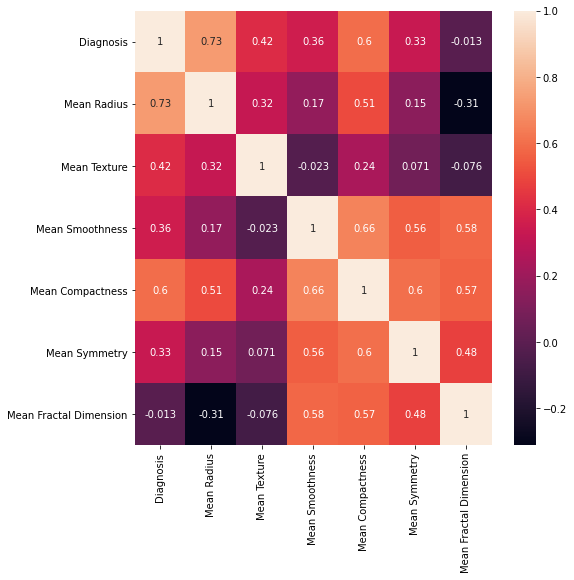

In [ ]:
df.iloc[:,0:8].corr() # getting how each variable is correlated with others
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,0:8].corr(),annot=True)



```
`# This is formatted as code`
```

Shuffling data so that random set is used to train and test. Setting train size as 70% of the dataset.


In [ ]:
shuffle_df = df.sample(frac=1)
#np.random.shuffle(shuffle_df)- maybe add this?
train_size = int(0.7 * len(shuffle_df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

Creating data and target variables. Then changes them to the right datatype to be used in the LogisticRegression function (I know it looks gross at the minute I'll fix it later maybe)

In [ ]:
y=df[['Class']].copy()
y=y.to_numpy()
y=y.T
y=np.reshape(y, len(y[0]))

y_train=train_set[['Class']].copy()
y_train=y_train.to_numpy()
y_train=y_train.T
y_train=np.reshape(y_train, len(y_train[0]))

y_test=test_set[['Class']].copy()
y_test=y_test.to_numpy()
y_test=y_test.T
y_test=np.reshape(y_test, len(y_test[0]))

X_train=train_set.copy()
X_train.drop("Class", axis=1, inplace=True)

X_test=test_set.copy()
X_test.drop("Class", axis=1, inplace=True)

KeyError: ignored

In [ ]:
y=df[['Diagnosis']].copy()
y=y.to_numpy()
y=y.T
y=np.reshape(y, len(y[0]))

y_train=train_set[['Diagnosis']].copy()
y_train=y_train.to_numpy()
y_train=y_train.T
y_train=np.reshape(y_train, len(y_train[0]))

y_test=test_set[['Diagnosis']].copy()
y_test=y_test.to_numpy()
y_test=y_test.T
y_test=np.reshape(y_test, len(y_test[0]))

X_train=train_set.copy()
X_train.drop("Diagnosis", axis=1, inplace=True)

X_test=test_set.copy()
X_test.drop("Diagnosis", axis=1, inplace=True)

If we want to oversample, but uses external package so not sure we're allowed. Also doesn't seem to change the overall accuracy of the model too much.

In [ ]:
sm=SMOTE()
sm_X_train, y_train= sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(sm_X_train, columns=X_train.columns)

Creating plot of total Benign, Melignent

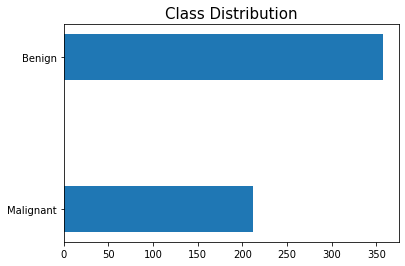

In [ ]:
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution', fontSize=15)
plt.show()

Normalising data to set it between 0 and 1

In [ ]:
def normalise(df):
  result=df.copy()
  for feature_name in df.columns:
    max_value=df[feature_name].max()
    min_value=df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

In [ ]:
X_train_scaled=normalise(X_train)
X_test_scaled=normalise(X_test)

x_train_scaled=X_train_scaled.to_numpy()
X_test_scaled=X_test_scaled.to_numpy()

In [ ]:
weights = np.zeros((df.shape[1],1))
weights

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
class LogisticRegression2:
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

  def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

  def cost_function(self, theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

  def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)






The logistic regression model used

In [ ]:
class LogisticRegression:

    def sigmoid(self, z): return 1 / (1 + e**(-z))

    def cost_function(self, X, y, weights):
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)

    def fit(self, X, y, loops=25, lr=0.05):
        loss = []
        weights = rand(X.shape[1])
        N = len(X)

        for _ in range(loops):
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N
            # Saving Progress
            loss.append(self.cost_function(X, y, weights))

        self.weights = weights
        self.loss = loss

    def predict(self, X):
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

The code to run the logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train, loops=5000, lr=0.8)
y_pred=logreg.predict(X_test_scaled)

In [ ]:
y_pred=pd.Series(y_pred, name = 'Actual')
y_test=pd.Series(y_test, name = 'Predicted')

df_confusion=pd.crosstab(y_test, y_pred)
print(df_confusion)

Actual      0   1
Predicted        
0          74  35
1           4  58


Defining function to make prettier confusion matricees

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

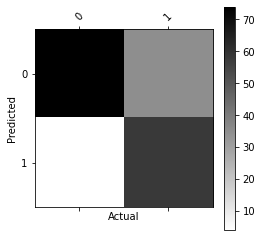

In [ ]:
plot_confusion_matrix(df_confusion)

Normalised confusion matrix (more useful imo)

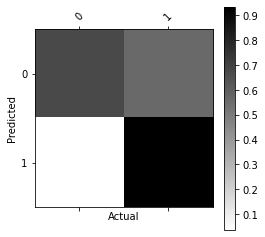

In [ ]:
df_conf_norm=df_confusion/df_confusion.sum(axis=1)
plot_confusion_matrix(df_conf_norm)

Finding the accuracy of the model

In [ ]:
accuracy=(len(y_test)-np.count_nonzero(y_test-y_pred))/len(y_test)
print(accuracy)

0.7719298245614035


Plotting total loss

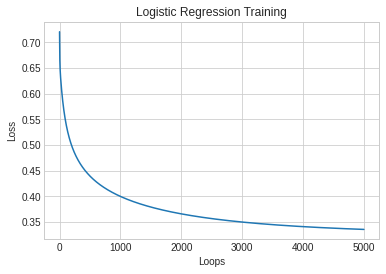

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.plot(logreg.loss)
plt.title('Logistic Regression Training')
plt.xlabel('Loops')
plt.ylabel('Loss')
plt.show()